## Testing the multivariate T, skew-normal, and skew-T distributions

In [1]:
# Imports
import numpy as np

from multivariate_skew_normal import multivariate_skew_normal as MSN
from multivariate_skew_t import multivariate_skew_t as MST
from multivariate_t import multivariate_t as MT

from scipy.stats import uniform as UNIF
from scipy.stats import multivariate_normal as MN
from scipy.stats import t as STUDENT

from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
%matplotlib inline

---

### The multivariate t distribution

[source: https://en.wikipedia.org/wiki/Multivariate_t-distribution]

**Parameters:**

 - location: $\mathbf\mu \in \mathbb{R}^p$
 - scale: $\mathbf\Sigma \in \mathbb{R}^{p \times p}$
 - degrees of freedom: $\nu \in \mathbb{R}$

**PDF:**

$$ f(\mathbf{x}; \mathbf\mu, \mathbf\Sigma, \nu) = 
\frac{\Gamma [(\nu + p) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{p/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left[ 1 + \frac{1}{\nu} (\mathbf{x} - \mathbf\mu)^T \mathbf\Sigma^{-1} (\mathbf{x} - \mathbf\mu) 
\right]^{-(\nu + p)/2} $$


$\nabla$**PDF:**

$$ \nabla f(\mathbf{x}; \mathbf\mu, \mathbf\Sigma, \nu) =
\frac{\Gamma [(\nu + p) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{p/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left[ 1 + \frac{1}{\nu} (\mathbf x - \mathbf\mu)^T \mathbf\Sigma^{-1} (\mathbf{x} - \mathbf\mu)
\right]^{-(\nu + p)/2-1} 
\left[ \frac{-(\nu + p)}{2} \frac{2}{\nu} \mathbf\Sigma^{-1} (\mathbf{x} - \mathbf\mu)
\right] $$

In [2]:
# Test 1: Numerical inspection of (log)pdf
# 1D case should be the same as stats.t

loc = UNIF.rvs()
scale = 1  # to ignore the difference between variance and standard deviation
df = UNIF.rvs(scale=10)

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_student = STUDENT.logpdf(x[0], df, loc=loc, scale=scale)
logv_mt = MT.logpdf(x[0], df, loc=loc, scale=scale)

print(logv_student)
print(logv_mt)

logv_student = STUDENT.logpdf(x, df, loc=loc, scale=scale)
logv_mt = MT.logpdf(x, df, loc=loc, scale=scale)

print(logv_student)
print(logv_mt)

-2.5028052320702594
-2.5028052320702594
[-2.50280523 -2.69016698 -1.37079919 -3.48107743 -3.96583637]
[-2.50280523 -2.69016698 -1.37079919 -3.48107743 -3.96583637]


In [3]:
# Test 2: Sanity checks for code run of derivative pdf
# 1D & 2D, 1 & 5 values

loc = 1.
scale = 2.
df = 2

x = UNIF.rvs(loc=0, scale=5, size=5)

print(MT.dpdf(x[0], df, loc=loc, scale=scale))
print(MT.dpdf(x, df, loc=loc, scale=scale))

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
df = 2

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

print(MT.dpdf(x[0], df, loc=loc, scale=scale))
print(MT.dpdf(x, df, loc=loc, scale=scale))

-0.038567343567907524
[-0.03856734 -0.05487797 -0.01683974 -0.05496102  0.00982252]
[-0.00928647 -0.48871413]
[[-9.28646545e-03 -4.88714129e-01]
 [-3.93314269e-03  6.22852605e-04]
 [ 4.79065074e-02 -1.18111007e-01]
 [-2.64138628e-04 -1.98385372e-04]
 [-4.92500602e-04 -2.37731675e-03]]


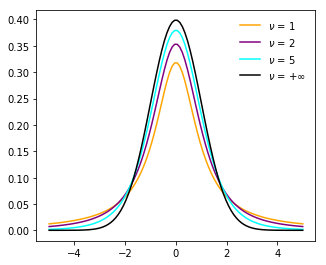

In [4]:
# Test 3: Visual test 1D pdf multiple dfs
# Compare with pdf in: https://en.wikipedia.org/wiki/Student%27s_t-distribution

loc = 0.
scale = 1.
dfs = [1, 2, 5, np.inf]
colors = ['orange', 'purple', 'cyan', 'black']

x = np.linspace(-5, 5, 100)

plt.figure(figsize=(5,4.25))
for df, color in zip(dfs, colors):
    p = MT.pdf(x, df, loc=loc, scale=scale)
    plt.plot(x, p, c=color, label=r'$\nu$ = '+(r'+$\infty$' if np.inf == df else str(df)))
plt.legend(fontsize='medium', loc='upper right', frameon=False)
plt.show()

Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg", width=350)

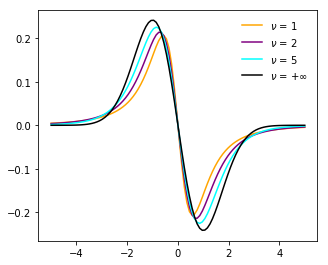

In [5]:
# Test 4: Visual test 1D derivative pdf multiple dfs

loc = 0.
scale = 1.
dfs = [1, 2, 5, np.inf]
colors = ['orange', 'purple', 'cyan', 'black']

x = np.linspace(-5, 5, 100)

plt.figure(figsize=(5,4.25))
for df, color in zip(dfs, colors):
    p = MT.dpdf(x, df, loc=loc, scale=scale)
    plt.plot(x, p, c=color, label=r'$\nu$ = '+(r'+$\infty$' if np.inf == df else str(df)))
plt.legend(fontsize='medium', loc='upper right', frameon=False)
plt.show()

In [6]:
# Test 5: Sanity check for code run of rvs
# 1D & 2D, 1 & 5 samples

loc = 1.
scale = 2.
df = 2

x1 = MT.rvs(df, loc=loc, scale=scale, size=1)
x5 = MT.rvs(df, loc=loc, scale=scale, size=5)
print(x1)
print(x5)

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
df = 2

x1 = MT.rvs(df, loc=loc, scale=scale, size=1)
x5 = MT.rvs(df, loc=loc, scale=scale, size=5)
print(x1)
print(x5)

2.09013262271001
[ 1.19877666  1.02448447  1.10650091  4.07633121 -0.56731167]
[0.48174186 0.63574541]
[[-1.24207734  0.68364984]
 [-0.04247938 -0.97484337]
 [ 0.73419051  0.27968482]
 [ 0.31568595  0.17652847]
 [-0.27726293 -0.16171362]]


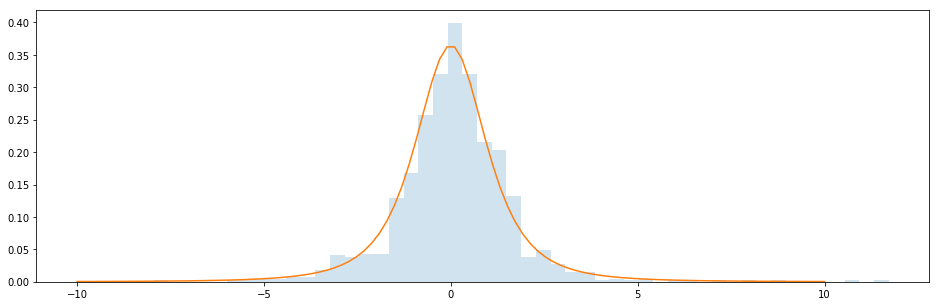

In [7]:
# Test 6: Sanity check for rvs vs pdf
# 1D histogram

loc = 0.
scale = 1
df = 2.74

r = MT.rvs(df, loc=loc, scale=scale, size=1000)

x = np.linspace(-10, 10, 100)
y = MT.pdf(x, df, loc=loc, scale=scale)

fig, ax = plt.subplots(1, 1, figsize=(16,5))
ax.hist(r, bins=50,density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, y)
plt.show()

---

### The multivariate skew normal distribution

[source: Statistical applications of the multivariate skew normal distribution - Azzalini A., Capitanio A. ( https://doi.org/10.1111/1467-9868.00194 )]

**Parameters:**

 - location: $\mathbf\xi \in \mathbb{R}^k$
 - scale: $\mathbf\Omega \in \mathbb{R}^{k \times k}$, 
 $\mathbf\Omega = \mathbf\omega \mathbf\Omega_z \mathbf\omega$, with 
 $\mathbf\omega = \sqrt{\mathbf\Omega} = \text{diag} \left\{ \sqrt{\mathbf\Omega_{ii}} \right\}_{i=1..k}$ 
 - shape: $\mathbf\alpha \in \mathbb{R}^k$

**PDF:**

$$ f_k(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \alpha) = 
2 \cdot \phi_k \left( \mathbf{y} - \mathbf\xi; \mathbf{0}, \mathbf\Omega \right) 
\ \Phi_1 \left( \mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 \right) = 
2 \cdot \frac{1}{(2 \pi)^{-k/2} \cdot | \mathbf\Omega |^{-1/2}} 
\ \Phi_1 \left( \mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 \right) $$

$\nabla$**PDF:**

$$ \nabla f_k(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \alpha) = 
2 \cdot \phi_k \left( \mathbf{y} - \mathbf\xi; \mathbf{0}, \mathbf\Omega \right) \left[
(\mathbf\alpha^T \mathbf\omega^{-1})^T
\cdot \phi_1 \left( 
\mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 
\right)
- \mathbf\Omega^{-1} (\mathbf{y} - \mathbf\xi)
\cdot \Phi_1 \left( \mathbf\alpha^T \mathbf\omega^{-1} (\mathbf{y} - \mathbf\xi); 0, 1 \right) 
\right] $$

**Notation:** 
 - $\phi_k$ is the $k$-dimensional (multivariate) normal pdf
 - $\phi_1$ is the 1D (univarate) normal pdf
 - $\Phi_1$ is the 1D (univariate) normal cdf

In [8]:
# Test 1: Numerical inspection of (log)pdf
# shape == 0 should be the same as multivariate normal distribution
# 1D case, 1 & 5 values

loc = 1.
scale = 2.
shape = 0.

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_mn = MN.logpdf(x[0], mean=loc, cov=scale)
logv_msn = MSN.logpdf(x[0], loc=loc, scale=scale, shape=shape)

print(logv_mn)
print(logv_msn)

logv_mn = MN.logpdf(x, mean=loc, cov=scale)
logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)

print(logv_mn)
print(logv_msn)

-3.6387981955754762
-3.6387981955754762
[-3.6387982  -3.33768812 -1.28160982 -2.72097025 -1.94375231]
[-3.6387982  -3.33768812 -1.28160982 -2.72097025 -1.94375231]


In [9]:
# Test 2: Numerical inspection of (log)pdf
# shape == 0 should be the same as multivariate normal distribution
# 2D case, 5 values

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [0, 0]

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

logv_mn = MN.logpdf(x, mean=loc, cov=scale)
logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)

print(logv_mn)
print(logv_msn)

[ -4.394113   -30.44933303  -4.23881456  -3.47119523 -55.9793434 ]
[ -4.394113   -30.44933303  -4.23881456  -3.47119523 -55.9793434 ]


In [10]:
# Test 3: Sanity checks for code run of derivative pdf
# 1D & 2D, 1 & 5 values

loc = 1.
scale = 2.
shape = 0.

x = UNIF.rvs(loc=0, scale=5, size=5)

print(MSN.dpdf(x[0], loc=loc, scale=scale, shape=shape))
print(MSN.dpdf(x, loc=loc, scale=scale, shape=shape))

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

print(MSN.dpdf(x[0], loc=loc, scale=scale, shape=shape))
print(MSN.dpdf(x, loc=loc, scale=scale, shape=shape))

-0.056371728721570785
[-0.05637173  0.02843448 -0.11953383  0.10267563 -0.02396045]
[-1.40900105e-08 -5.12917515e-09]
[[-1.40900105e-08 -5.12917515e-09]
 [-2.58614167e-01  2.39490938e-01]
 [-5.86540896e-19  3.85282219e-20]
 [-9.67803529e-18 -4.77608685e-18]
 [ 7.60691765e-01 -1.48694439e+00]]


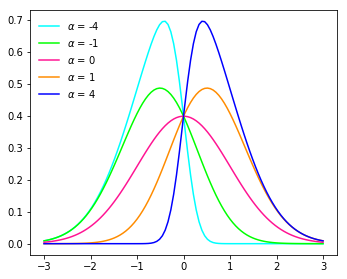

In [11]:
# Test 4: Visual test 1D pdf multiple shapes
# Compare with pdf in: https://en.wikipedia.org/wiki/Skew_normal_distribution

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'lime', 'deeppink', 'darkorange', 'blue']

x = np.linspace(-3, 3, 100)

plt.figure(figsize=(5.5,4.5))
for shape, color in zip(shapes, colors):
    p = MSN.pdf(x, loc=loc, scale=scale, shape=shape)
    plt.plot(x, p, c=color, label=r'$\alpha$ = '+str(shape))
plt.legend(fontsize='medium', loc='upper left', frameon=False)
plt.show()

Image(url= "https://upload.wikimedia.org/wikipedia/commons/6/63/Skew_normal_densities.svg", width=375)

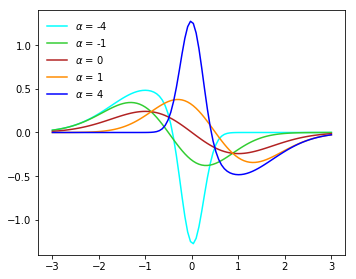

In [12]:
# Test 5: Visual test 1D derivative pdf multiple shapes

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'limegreen', 'firebrick', 'darkorange', 'blue']

x = np.linspace(-3, 3, 100)

plt.figure(figsize=(5.5,4.5))
for shape, color in zip(shapes, colors):
    dp = MSN.dpdf(x, loc=loc, scale=scale, shape=shape)
    plt.plot(x, dp, c=color, label=r'$\alpha$ = '+str(shape))
plt.legend(fontsize='medium', loc='upper left', frameon=False)
plt.show()

In [13]:
# Test 6: Sanity check for code run of rvs
# 1D & 2D, 1 & 5 samples

loc = 1.
scale = 2.
shape = 0.

x1 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=1)
x5 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]

x1 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=1)
x5 = MSN.rvs(loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

-0.828568944873306
[ 2.61314136  0.14257527 -1.73431167 -0.90558609  1.75679259]
[0.52930066 0.65702539]
[[ 0.40143358  0.54408407]
 [ 0.25179218  0.26885987]
 [-0.19277056  0.45409081]
 [ 0.35703657  0.40994814]
 [-0.08171437  0.67545489]]


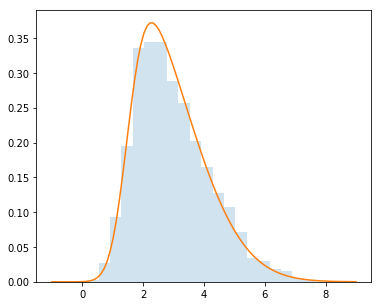

In [14]:
# Test 7: Sanity check for rvs vs pdf
# 1D histogram

loc = 1.5
scale = 3.5
shape = 4

r = MSN.rvs(loc=loc, scale=scale, shape=shape, size=1000)

x = np.linspace(-1, 9, 100)
y = MSN.pdf(x, loc=loc, scale=scale, shape=shape)

fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, y)
plt.show()

---

### The multivariate skew t distribution

[source: Distributions generated by perturbation of symmetry with emphasis on a multivariate skew t-distribution - Azzalini A., Capitanio A. ( https://doi.org/10.1111/1467-9868.00391 )]

**Parameters:**

 - location: $\mathbf\xi \in \mathbb{R}^d$
 - scale: $\mathbf\Omega \in \mathbb{R}^{d \times d}$,
 $\mathbf\Omega = \mathbf\omega \mathbf\Omega_z \mathbf\omega$, with 
 $\mathbf\omega = \sqrt{\mathbf\Omega} = \text{diag} \left\{ \sqrt{\mathbf\Omega_{ii}} \right\}_{i=1..d}$ 
 - shape: $\mathbf\alpha \in \mathbb{R}^d$
 - degrees of freedom: $\nu \in \mathbb{R}$

**PDF:**

$$ f_d(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \mathbf\alpha, \nu) = 
2 \cdot t_d(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \nu)
\cdot T_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d 
\right) $$
$$ = 2 \cdot \frac{\Gamma [(\nu + p) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{p/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left( 1 + \frac{1}{\nu} Q_\mathbf{y} \right)^{-(\nu + p)/2}
\cdot T_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d 
\right) , $$

where:

$$ \mathbf{z} = \mathbf\omega^{-1} ( \mathbf{y} - \mathbf\xi ), \quad 
Q_\mathbf{y} = ( \mathbf{y} - \mathbf\xi )^T \mathbf\Omega^{-1} ( \mathbf{y} - \mathbf\xi )
$$

$\nabla$**PDF:**

$$ \nabla f_d(\mathbf{y}; \mathbf\xi, \mathbf\Omega, \mathbf\alpha, \nu) =
2 \cdot \frac{\Gamma [(\nu + d) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{d/2} \cdot | \mathbf\Omega |^{1/2}} 
\left( 1 + \frac{1}{\nu} Q_\mathbf{y} \right)^{-(\nu + p)/2-1} 
\left[ \frac{-(\nu + p)}{2} \frac{1}{\nu} \mathbf\Omega^{-1} (\mathbf{y} - \mathbf\xi) 
\right] 
\cdot T_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d
\right) $$
$$ +\ 2 \cdot \frac{\Gamma [(\nu + d) / 2]}{\Gamma (\nu / 2) \cdot (\nu \pi)^{d/2} \cdot | \mathbf\Sigma |^{1/2}} 
\left( 1 + \frac{1}{\nu} Q_\mathbf{y} \right)^{-(\nu + d)/2}
\cdot t_1 \left( \left( \frac{\nu + d}{\nu + Q_\mathbf{y}} 
\right)^{1/2} \mathbf\alpha^T \mathbf{z}; 0, 1, \nu + d
\right) $$
$$ \cdot \ \left[ 
-\frac{1}{2} (\nu + d)^{1/2} (\nu + Q_\mathbf{y})^{-3/2} 
\ \mathbf\alpha^T \mathbf{z} \cdot \mathbf\Omega^{-1} (\mathbf{y} - \mathbf\xi)
+ (\nu + d)^{1/2} (\nu + Q_\mathbf{y})^{-1/2} \cdot (\mathbf\alpha^T \mathbf\omega^{-1})^T
\right]
$$

In [15]:
# Test 1: Numerical comparison of logpdf to multivariate t distribution
# i.e. shape == 0
# 1D & 2D, 1 & 5 values

loc = UNIF.rvs() * 5
scale = UNIF.rvs() * 5
shape = 0  # multiv. t 
df = UNIF.rvs() * 5

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_mt = MT.logpdf(x[0], df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

logv_mt = MT.logpdf(x, df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

print("~~~")

loc = UNIF.rvs(size=2) * 5
__scale__  = UNIF.rvs(size=2) * 5
scale = np.outer(__scale__, __scale__)
shape = np.zeros(2)  # multiv. t 
df = UNIF.rvs() * 5

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

logv_mt = MT.logpdf(x[0], df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

logv_mt = MT.logpdf(x, df, loc=loc, scale=scale)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_mt)
print(logv_mst)

-2.245353383173421
-2.245353383173421
[-2.24535338 -1.81002179 -1.95248472 -1.97625793 -1.75574355]
[-2.24535338 -1.81002179 -1.95248472 -1.97625793 -1.75574355]
~~~
-6.235128712178948
-6.235128712178948
[-6.23512871 -7.98422522 -3.99361758 -7.81212123 -4.30102399]
[-6.23512871 -7.98422522 -3.99361758 -7.81212123 -4.30102399]


In [16]:
# Test 2: Numerical comparison of logpdf to multivariate skew normal distribution
# i.e. df == np.inf
# 1D & 2D, 1 & 5 values

loc = UNIF.rvs() * 5
scale = UNIF.rvs() * 5
shape = UNIF.rvs() * 5
df = np.inf  # multiv. skew normal

x = UNIF.rvs(loc=0, scale=5, size=5)

logv_msn = MSN.logpdf(x[0], loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

print("~~~")

loc = UNIF.rvs(size=2) * 5
__scale__  = UNIF.rvs(size=2) * 5
scale = np.outer(__scale__, __scale__)
shape = UNIF.rvs(size=2) * 5
df = np.inf  # multiv. skew normal

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

logv_msn = MSN.logpdf(x[0], loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x[0], df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

logv_msn = MSN.logpdf(x, loc=loc, scale=scale, shape=shape)
logv_mst = MST.logpdf(x, df, loc=loc, scale=scale, shape=shape)

print(logv_msn)
print(logv_mst)

-41.49744663298561
-41.49744663298561
[-41.49744663 -87.87310351 -17.57412875 -15.95761534 -10.84468516]
[-41.49744663 -87.87310351 -17.57412875 -15.95761534 -10.84468516]
~~~
-11.908798520219754
-11.908798520219754
[-11.90879852  -5.90955815  -3.00887397 -18.91102836  -4.72329219]
[-11.90879852  -5.90955815  -3.00887397 -18.91102836  -4.72329219]


In [17]:
# Test 3: Sanity checks for code run of derivative pdf
# 1D & 2D, 1 & 5 values

loc = 1.
scale = 2.
shape = 0.
df = 2.74

x = UNIF.rvs(loc=0, scale=5, size=5)

print(MST.dpdf(x[0], df, loc=loc, scale=scale, shape=shape))
print(MST.dpdf(x, df, loc=loc, scale=scale, shape=shape))

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]
df = 1.74

x = UNIF.rvs(loc=0, scale=5, size=10).reshape((5,2))

print(MST.dpdf(x[0], df, loc=loc, scale=scale, shape=shape))
print(MST.dpdf(x, df, loc=loc, scale=scale, shape=shape))

-0.02251956829745477
[-0.02251957 -0.0193057  -0.02343832 -0.00887187 -0.00867726]
[-0.00462582 -0.00091371]
[[-4.62582083e-03 -9.13709893e-04]
 [ 2.98845805e-04 -6.44822318e-04]
 [-5.65841355e-04 -2.23773544e-03]
 [-6.70958535e-04  4.20129286e-06]
 [-1.56757082e-02 -3.40505398e-02]]


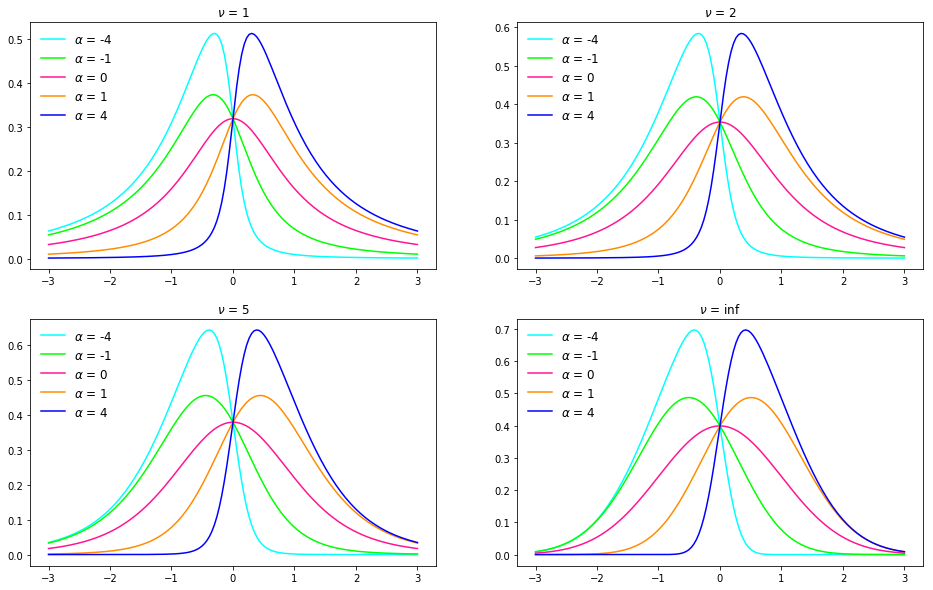

In [18]:
# Test 4: Visual test 1D pdf for multiple shapes and multiple dfs

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'lime', 'deeppink', 'darkorange', 'blue']
dfs = [1, 2, 5, np.inf]

x = np.linspace(-3, 3, 150)

fig, axs = plt.subplots(2, 2, figsize=(16,10))
for i, ax in enumerate(axs.flatten()):
    for shape, color in zip(shapes, colors):
        p = MST.pdf(x, dfs[i], loc=loc, scale=scale, shape=shape)
        ax.plot(x, p, c=color, label=r'$\alpha$ = '+str(shape))
    ax.legend(fontsize='large', loc='upper left', frameon=False)
    ax.set_title(r'$\nu$ = ' + str(dfs[i]))
plt.show()

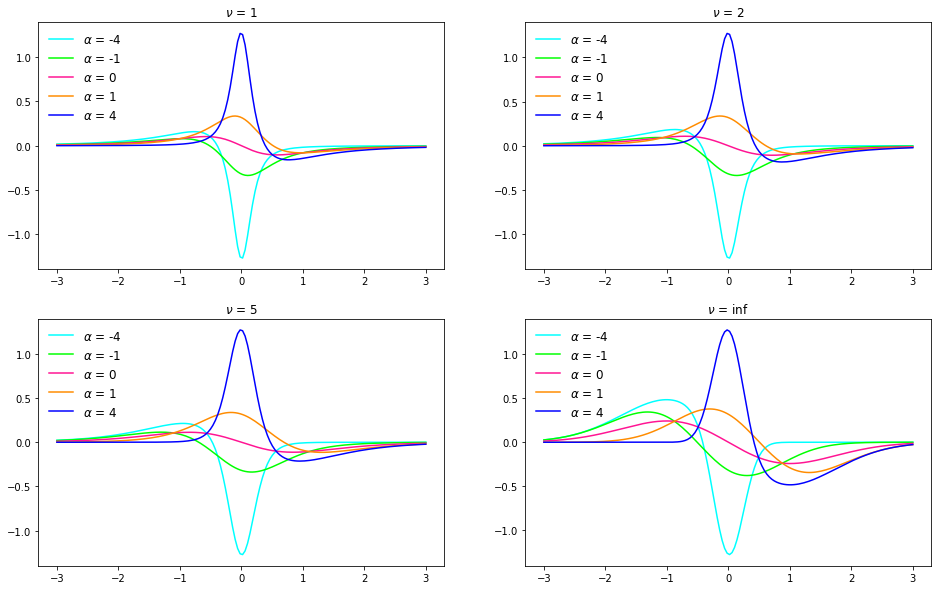

In [19]:
# Test 4: Visual test 1D derivative pdf for multiple shapes and multiple dfs

loc = 0.
scale = 1.
shapes = [-4, -1, 0, 1, 4]
colors = ['cyan', 'lime', 'deeppink', 'darkorange', 'blue']
dfs = [1, 2, 5, np.inf]

x = np.linspace(-3, 3, 150)

fig, axs = plt.subplots(2, 2, figsize=(16,10))
for i, ax in enumerate(axs.flatten()):
    for shape, color in zip(shapes, colors):
        p = MST.dpdf(x, dfs[i], loc=loc, scale=scale, shape=shape)
        ax.plot(x, p, c=color, label=r'$\alpha$ = '+str(shape))
    ax.legend(fontsize='large', loc='upper left', frameon=False)
    ax.set_title(r'$\nu$ = ' + str(dfs[i]))
plt.show()

In [20]:
# Test 5: Sanity check for code run of rvs
# 1D & 2D, 1 & 5 samples

loc = 1.
scale = 2.
shape = 0.
df = 2.74

x1 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=1)
x5 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

loc = [0.1, 0.4]
scale = [[0.2, 0.1], [0.1, 0.3]]   # needs to be PSD matrix
shape = [1., 2.]
df = 1.74

x1 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=1)
x5 = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=5)
print(x1)
print(x5)

(1,)
(1,)
(5,)
(5, 1)
0.7301031885492769
[ 0.2659957   2.2848169  -0.54748902  1.36256579  5.09736587]
(1,)
(1, 2)
(5,)
(5, 2)
[-0.36590445  1.06394783]
[[0.05167436 0.28652515]
 [0.28521838 1.64607065]
 [0.78945424 1.64364761]
 [0.7904117  0.76109876]
 [0.19150532 0.46277266]]


(1000,)
(1000, 1)


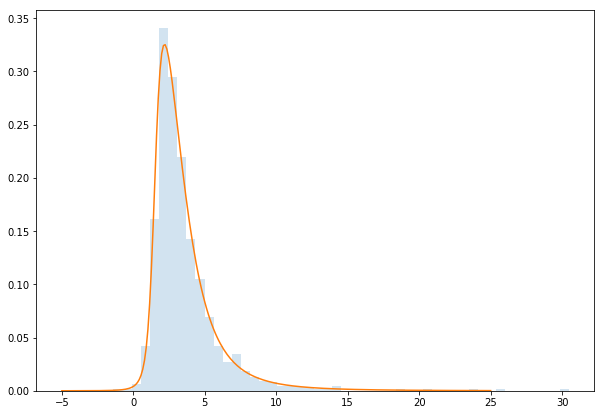

In [35]:
# Test 6: Sanity check for rvs vs pdf
# 1D histogram

loc = 1.5
scale = 3.5
shape = 4
df = 2.74

r = MST.rvs(df, loc=loc, scale=scale, shape=shape, size=1000)

x = np.linspace(-5, 25, 250)
y = MST.pdf(x, df, loc=loc, scale=scale, shape=shape)

fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.hist(r, bins=50, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, y)
plt.show()